<a href="https://colab.research.google.com/github/Dharuf/Phyton/blob/main/Transfer_Learning_Cats_vs_Dogs_DIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download e Instalação da biblioteca CATS-VS-DOGS

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:08<00:00, 226MB/s]
100% 1.06G/1.06G [00:08<00:00, 135MB/s]


Extraindo a Pasta "dogs-vs-cats.zip"

In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

Importação das Bibliotecas.

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

setando a geração de treino e teste

In [10]:
# geração
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


Preparando o dataset

In [11]:
#Normalizando
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [12]:
# Criando modelo CNN

model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3), padding = 'valid',activation = 'relu',input_shape = (256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = 2,padding ='valid'))

model.add(Conv2D(64,kernel_size = (3,3), padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = 2,padding = 'valid'))

model.add(Conv2D(128,kernel_size = (3,3), padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation ='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [14]:
model.compile(optimizer ='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 86s 114ms/step - loss: 1.1909 - accuracy: 0.5913 - val_loss: 0.6170 - val_accuracy: 0.6516
Epoch 2/10
625/625 [==============================] - 70s 110ms/step - loss: 0.5716 - accuracy: 0.7049 - val_loss: 0.5641 - val_accuracy: 0.7194
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4968 - accuracy: 0.7620 - val_loss: 0.8253 - val_accuracy: 0.5854
Epoch 4/10
625/625 [==============================] - 66s 106ms/step - loss: 0.4341 - accuracy: 0.7993 - val_loss: 0.4703 - val_accuracy: 0.7816
Epoch 5/10
625/625 [==============================] - 69s 109ms/step - loss: 0.3561 - accuracy: 0.8382 - val_loss: 0.5011 - val_accuracy: 0.7872
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.2852 - accuracy: 0.8785 - val_loss: 0.7204 - val_accuracy: 0.7318
Epoch 7/10
625/625 [==============================] - 66s 104ms/step - loss: 0.2177 - accuracy: 0.9104 - val_loss: 0.8180 - val_ac

gerando um grafico da acuracia do treino e validação

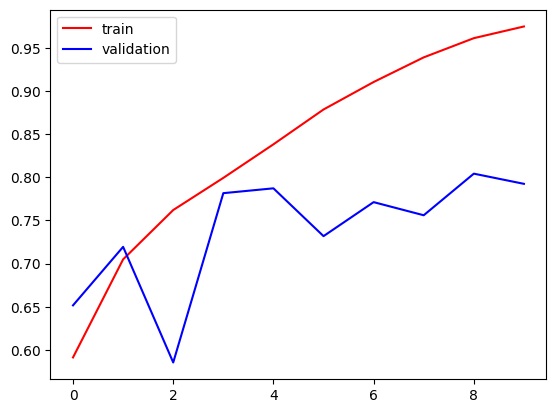

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color ='red',label ='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

gerando um grafico das perdas do treino e validação

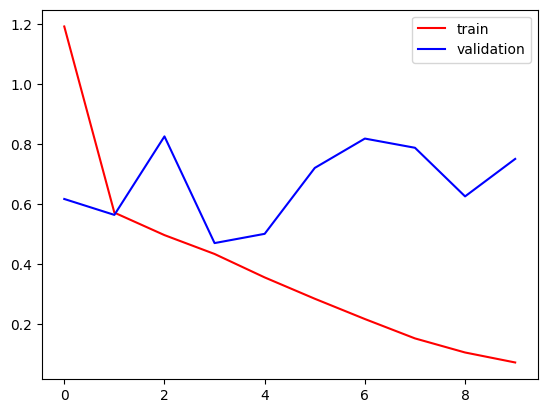

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()